<a href="https://colab.research.google.com/github/Amarnadh2001/MainProject_B12/blob/main/Project_B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Audio.zip -d /content/sample_data/

Archive:  /content/drive/MyDrive/Audio.zip
   creating: /content/sample_data/Audio/
   creating: /content/sample_data/Audio/dementia/
  inflating: /content/sample_data/Audio/dementia/AbeBurrows_5.wav  
  inflating: /content/sample_data/Audio/dementia/aileenhernandez_0.wav  
  inflating: /content/sample_data/Audio/dementia/alanramsey_10.wav  
  inflating: /content/sample_data/Audio/dementia/AllanBurns_5.wav  
   creating: /content/sample_data/Audio/nondementia/
  inflating: /content/sample_data/Audio/nondementia/AlanArkin_1.wav  
  inflating: /content/sample_data/Audio/nondementia/AlanArkin_3.wav  
  inflating: /content/sample_data/Audio/nondementia/AlPacino_3.wav  
  inflating: /content/sample_data/Audio/nondementia/Angela Lansbury_1.wav  


In [ ]:
!rm -rf /content/sample_data/Audio

In [ ]:
!rm -rf /content/sample_data/AugmentedSpectrograms

In [ ]:
!rm -rf /content/sample_data/MFCCSpectrograms

Displaying audio signals in subfolder: dementia


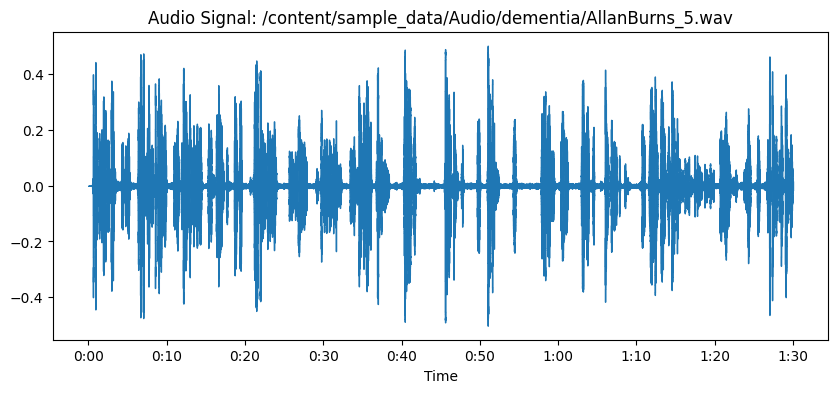

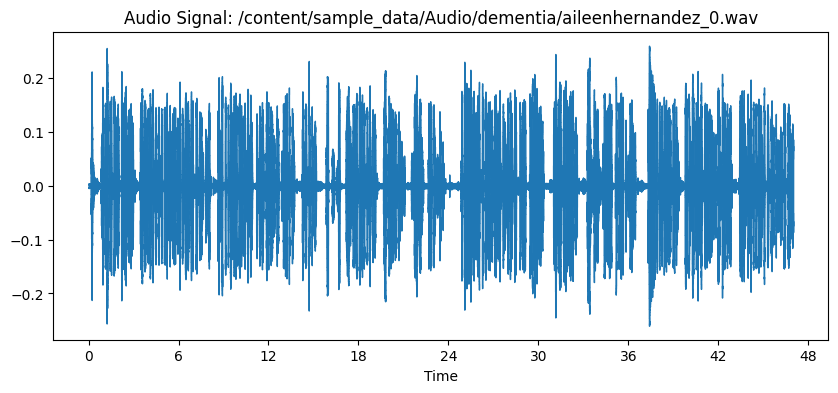

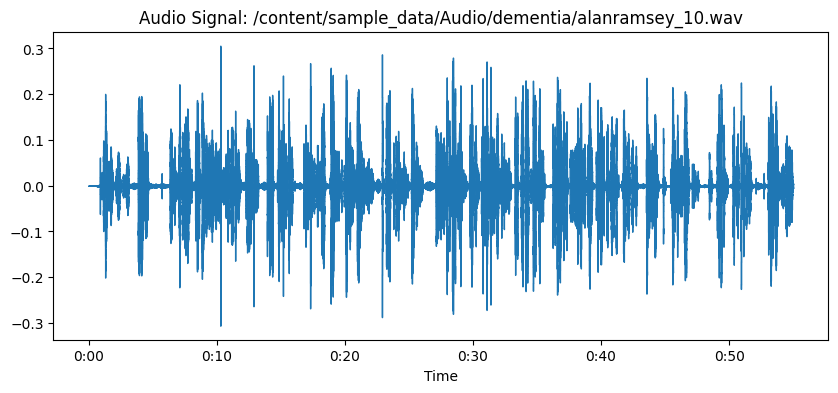

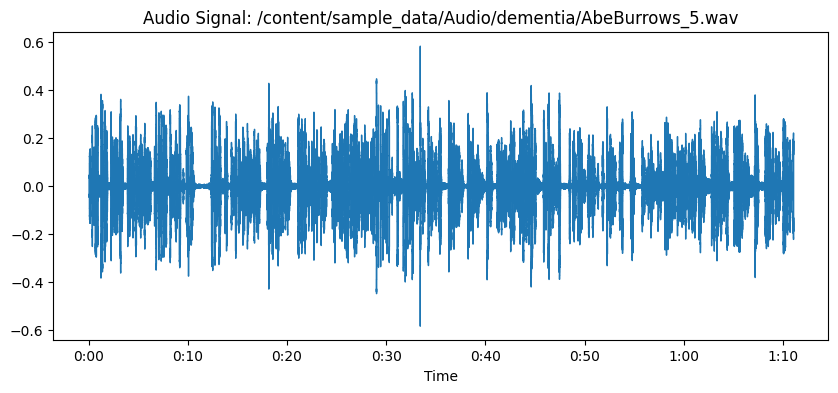

Displaying audio signals in subfolder: nondementia


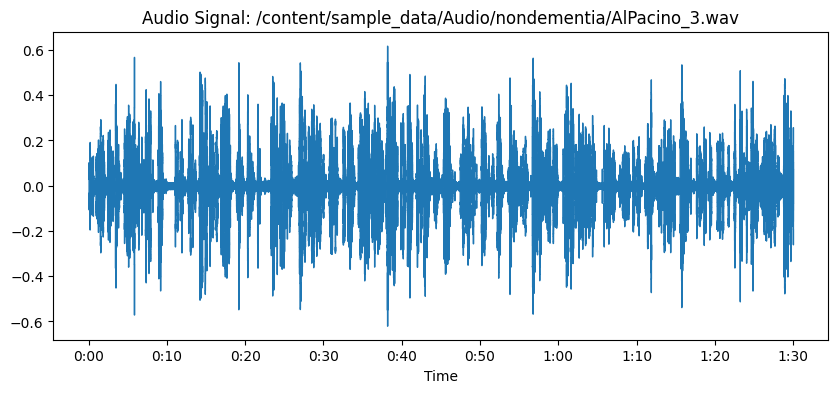

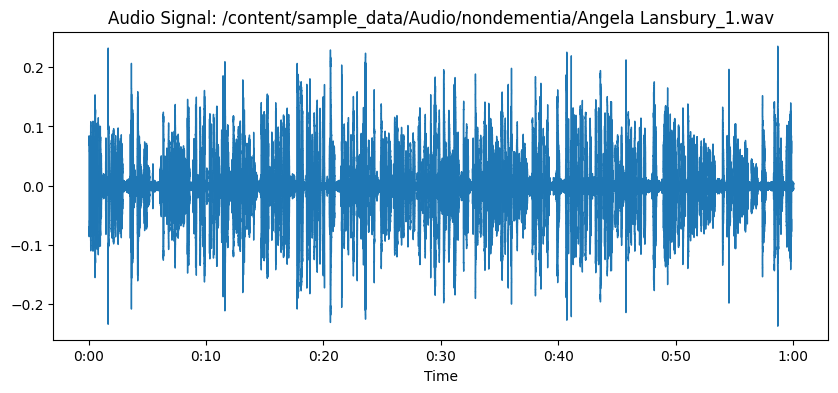

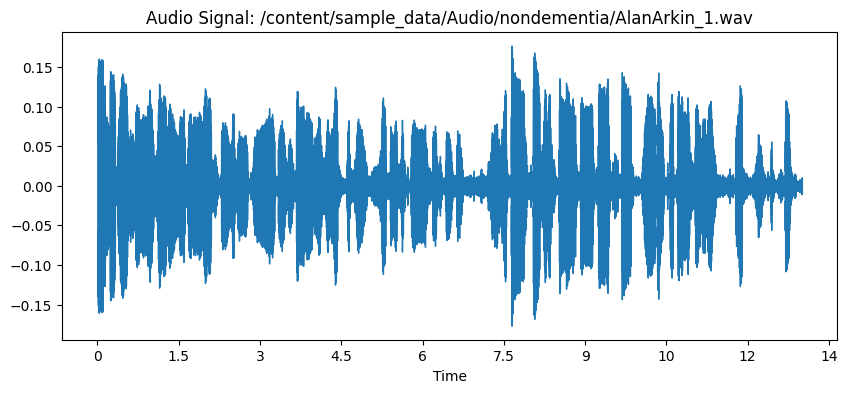

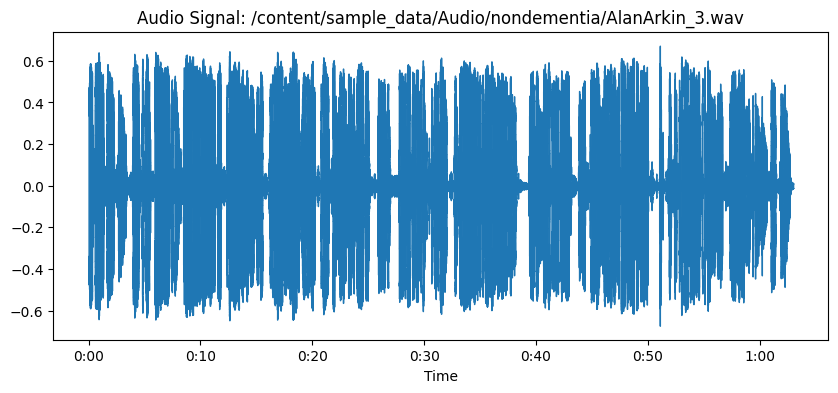

Audio signal display completed.


In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to the directory containing subfolders with audio files
audio_directory = "/content/sample_data/Audio"

# Function to display the audio signal waveforms
def display_audio_signals_in_subfolder(subfolder_path):
    for root, dirs, files in os.walk(subfolder_path):
        for file in files:
            if file.endswith(".wav"):  # You can specify the audio file format you have
                audio_path = os.path.join(root, file)
                # Load and display the audio signal
                y, sr = librosa.load(audio_path)
                plt.figure(figsize=(10, 4))
                librosa.display.waveshow(y, sr=sr)
                plt.title(f'Audio Signal: {audio_path}')
                plt.show()

# Iterate through subfolders within the main audio directory
for subdir in os.listdir(audio_directory):
    subfolder_path = os.path.join(audio_directory, subdir)
    if os.path.isdir(subfolder_path):
        print(f"Displaying audio signals in subfolder: {subdir}")
        display_audio_signals_in_subfolder(subfolder_path)

print("Audio signal display completed.")

In [5]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/sample_data/Audio/dementia"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  4


In [6]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/sample_data/Audio/nondementia"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  4


In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to the directory containing audio files
audio_directory = "/content/sample_data/Audio"

# Path to the directory where you want to save MFCC spectrogram images
spectrogram_directory = "/content/sample_data/MFCCSpectrograms"

# Path to the directory where you want to save augmented MFCC spectrogram images
augmented_spectrogram_directory = "/content/sample_data/AugmentedSpectrograms"

# Define the function to convert audio to MFCC spectrograms
def convert_audio_to_mfcc_spectrograms(audio_path, output_dir, num_images=8):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_path)

    # Create a directory to store MFCC spectrogram images
    os.makedirs(output_dir, exist_ok=True)

    # Generate MFCC spectrograms
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512)

    # Split the MFCC spectrogram into 'num_images' equal parts
    mfcc_slices = np.array_split(mfccs, num_images, axis=1)

    for i, mfcc_slice in enumerate(mfcc_slices):
        # Plot and save the MFCC spectrogram image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_slice, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC Spectrogram {i + 1}')

        output_file = os.path.join(output_dir, f"{os.path.basename(audio_path)}_{i}.png")
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

# Define the function to add noise to an MFCC image
def add_noise_to_mfcc_image(image, noise_level=0.01):
    np.random.seed(0)
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 1)

# Define the function to perform data augmentation on MFCC spectrogram images
def augment_mfcc_spectrograms(audio_file, output_dir, num_images=8):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_file)

    # Create a directory to store augmented MFCC spectrogram images
    os.makedirs(output_dir, exist_ok=True)

    # Generate MFCC spectrograms
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512)

    # Split the MFCC spectrogram into 'num_images' equal parts
    mfcc_slices = np.array_split(mfccs, num_images, axis=1)

    for i, mfcc_slice in enumerate(mfcc_slices):
        # Plot and save the original MFCC spectrogram image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_slice, x_axis='time')
        plt.colorbar()
        plt.title(f'Original MFCC Spectrogram {i + 1}')

        original_output_file = os.path.join(output_dir, f"{os.path.basename(audio_file)}_{i}_original.png")
        plt.savefig(original_output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

        # Apply data augmentation by adding noise to the MFCC image
        augmented_mfcc_slice = add_noise_to_mfcc_image(mfcc_slice)

        # Plot and save the augmented MFCC spectrogram image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(augmented_mfcc_slice, x_axis='time')
        plt.colorbar()
        plt.title(f'Augmented MFCC Spectrogram {i + 1}')

        augmented_output_file = os.path.join(output_dir, f"{os.path.basename(audio_file)}_{i}_augmented.png")
        plt.savefig(augmented_output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

# Recursively process all audio files in subfolders
for root, dirs, files in os.walk(audio_directory):
    for file in files:
        if file.endswith(".wav"):  # You can specify the audio file format you have
            audio_path = os.path.join(root, file)
            output_dir = os.path.join(spectrogram_directory, os.path.relpath(root, audio_directory))
            augmented_output_dir = os.path.join(augmented_spectrogram_directory, os.path.relpath(root, audio_directory))

            convert_audio_to_mfcc_spectrograms(audio_path, output_dir, num_images=8)
            augment_mfcc_spectrograms(audio_path, augmented_output_dir, num_images=8)

print("MFCC spectrogram conversion and augmentation completed.")

MFCC spectrogram conversion and augmentation completed.


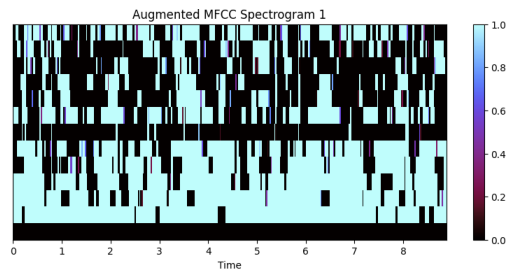

In [8]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/sample_data/AugmentedSpectrograms/dementia/AbeBurrows_5.wav_0_augmented.png")
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


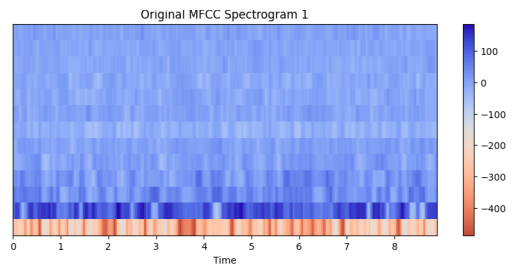

In [9]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/sample_data/AugmentedSpectrograms/dementia/AbeBurrows_5.wav_0_original.png")
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

4/4 [==============================] - 92s 21s/step
Epoch 1/5
Random Forest Classifier:
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  6]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

    dementia       1.00      0.54      0.70        13
 nondementia       0.68      1.00      0.81        13

    accuracy                           0.77        26
   macro avg       0.84      0.77      0.76        26
weighted avg       0.84      0.77      0.76        26



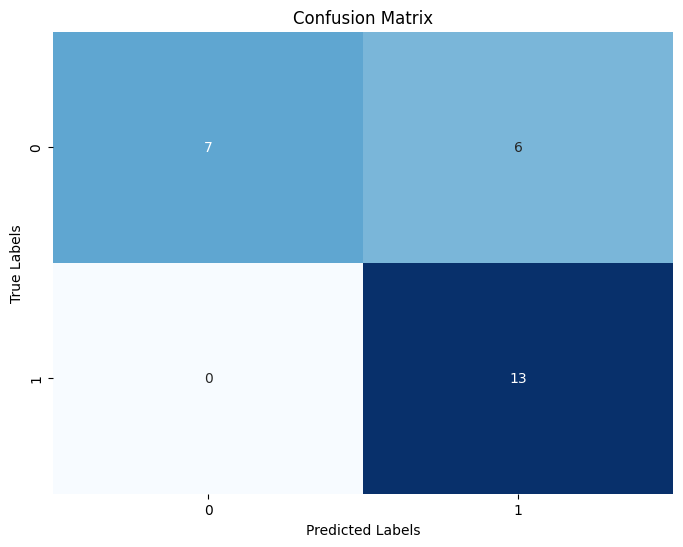

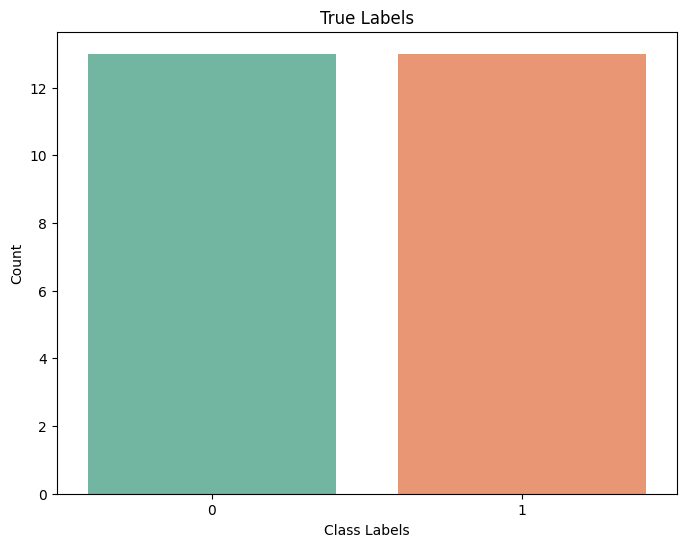

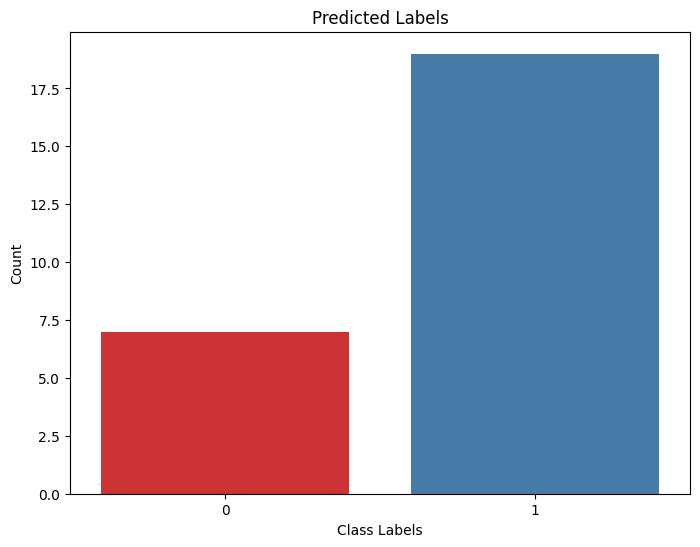

Epoch 2/5
Random Forest Classifier:
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  6]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

    dementia       1.00      0.54      0.70        13
 nondementia       0.68      1.00      0.81        13

    accuracy                           0.77        26
   macro avg       0.84      0.77      0.76        26
weighted avg       0.84      0.77      0.76        26



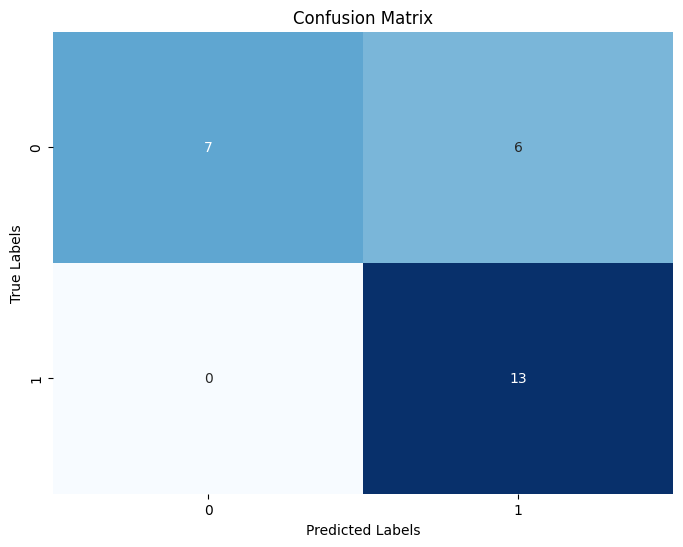

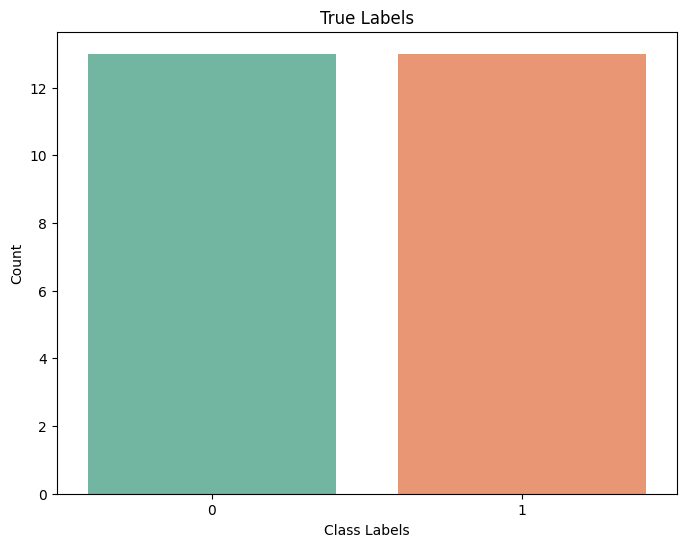

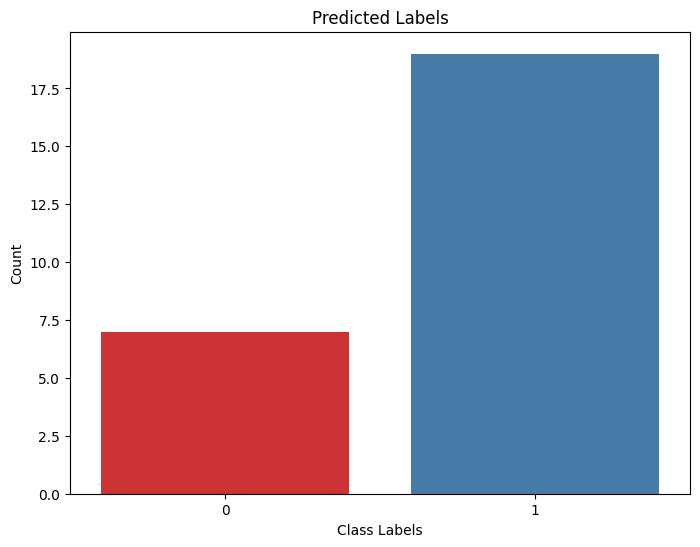

Epoch 3/5
Random Forest Classifier:
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  6]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

    dementia       1.00      0.54      0.70        13
 nondementia       0.68      1.00      0.81        13

    accuracy                           0.77        26
   macro avg       0.84      0.77      0.76        26
weighted avg       0.84      0.77      0.76        26



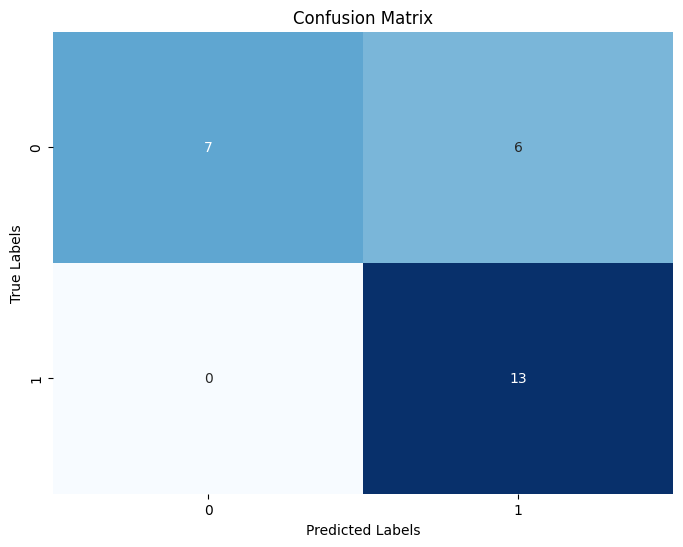

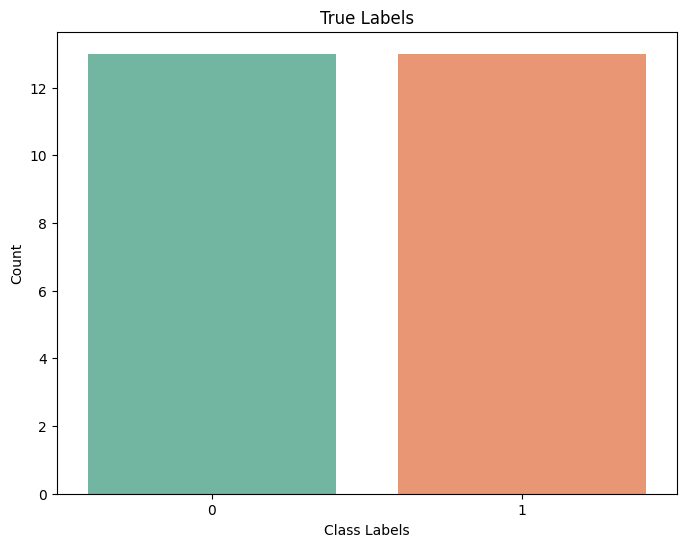

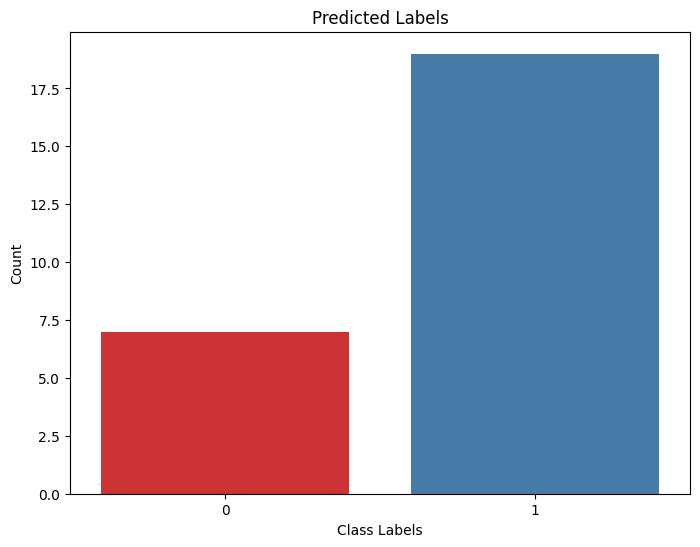

Epoch 4/5
Random Forest Classifier:
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  6]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

    dementia       1.00      0.54      0.70        13
 nondementia       0.68      1.00      0.81        13

    accuracy                           0.77        26
   macro avg       0.84      0.77      0.76        26
weighted avg       0.84      0.77      0.76        26



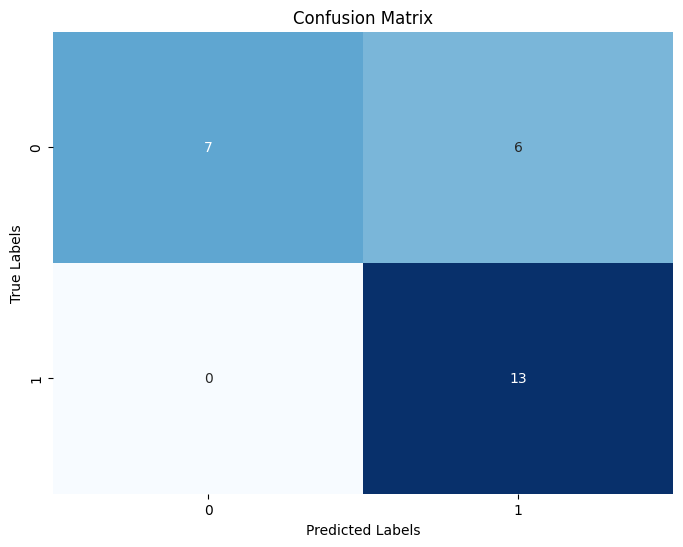

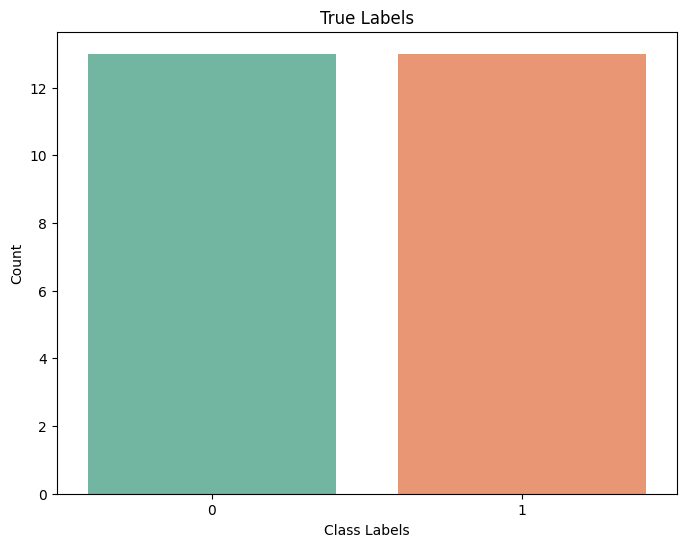

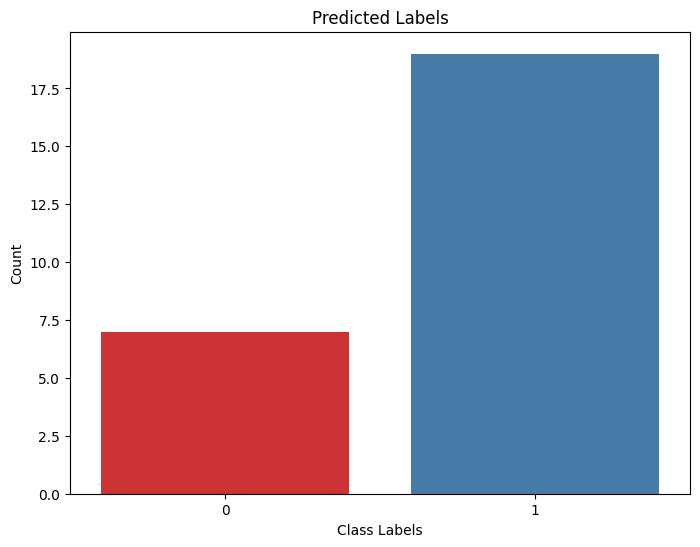

Epoch 5/5
Random Forest Classifier:
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  6]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

    dementia       1.00      0.54      0.70        13
 nondementia       0.68      1.00      0.81        13

    accuracy                           0.77        26
   macro avg       0.84      0.77      0.76        26
weighted avg       0.84      0.77      0.76        26



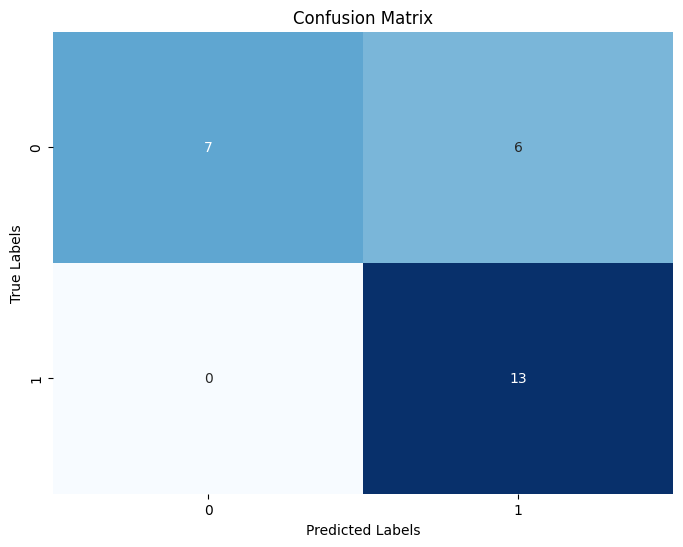

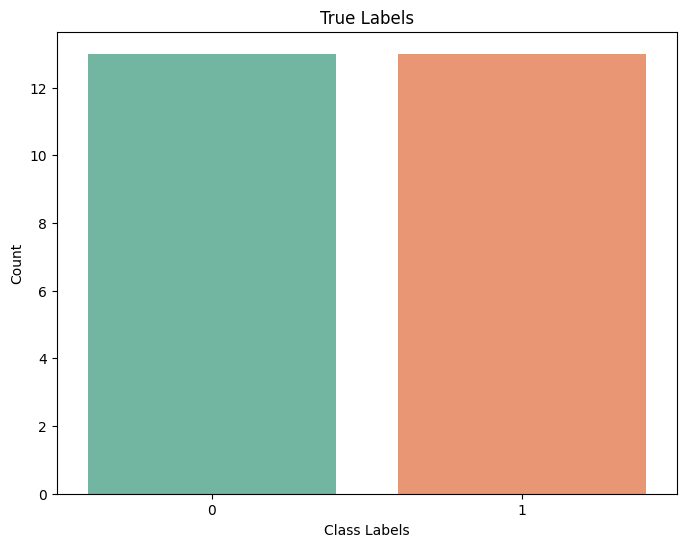

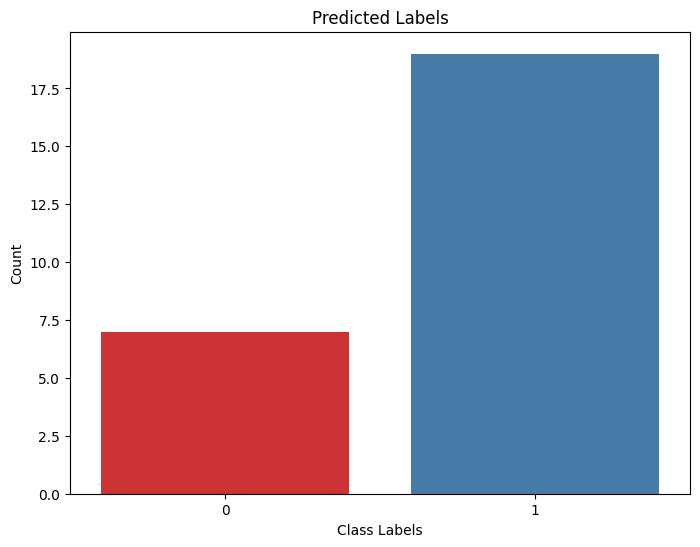

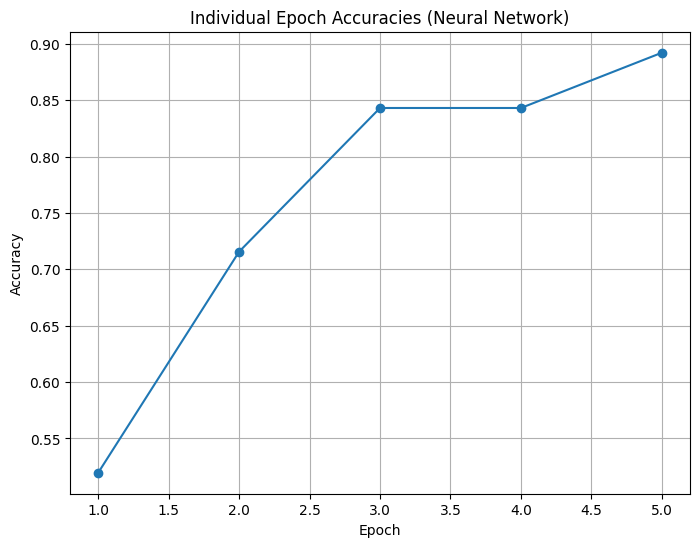

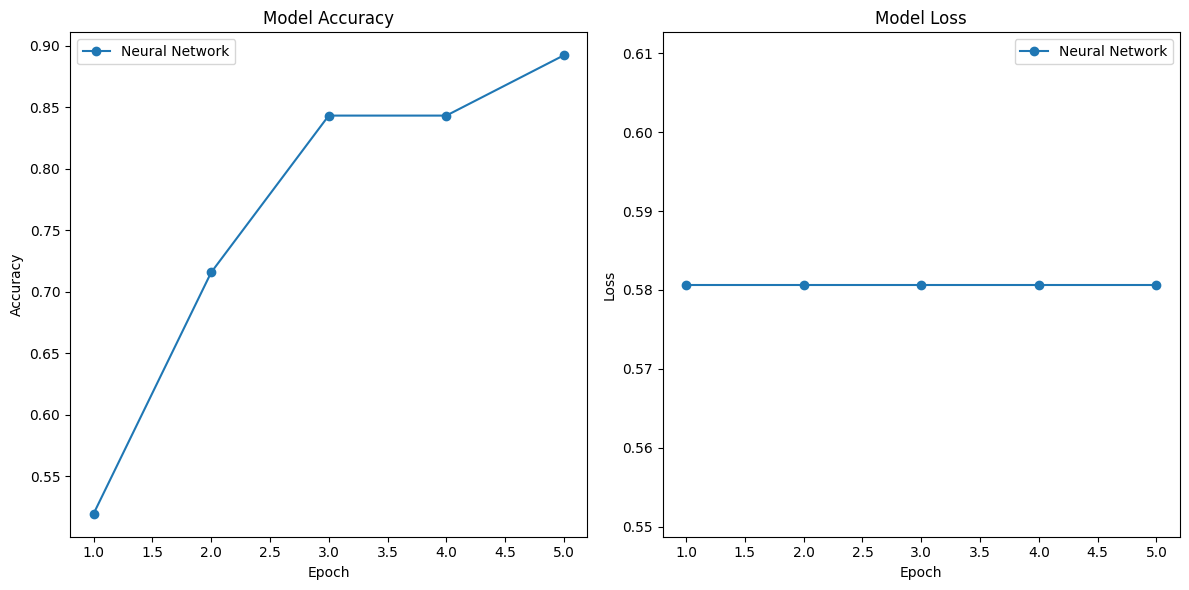

In [10]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model  # Added import statement
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, concatenate
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import InceptionV3, VGG16

# Define the directory containing augmented spectrogram images
augmented_directory = '/content/sample_data/AugmentedSpectrograms'

# Define input shape for your spectrogram images
input_shape = (224, 224, 3)

# Load pre-trained GoogleNet (InceptionV3) and VGG16 models
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze layers in the pre-trained models (optional)
for layer in inception_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers:
    layer.trainable = False

# Global average pooling layers
inception_output = GlobalAveragePooling2D()(inception_model.output)
vgg16_output = GlobalAveragePooling2D()(vgg16_model.output)

# Concatenate the outputs of both models
merged = concatenate([inception_output, vgg16_output])

# Feature fusion layer
feature_fusion = Dense(512, activation='relu')(merged)

# Create a feature extraction model
feature_extraction_model = Model(inputs=[inception_model.input, vgg16_model.input], outputs=feature_fusion)

# Data preprocessing
data = []
labels = []

class_labels = ["dementia", "nondementia"]

for label_idx, label in enumerate(class_labels):
    label_directory = os.path.join(augmented_directory, label)
    for filename in os.listdir(label_directory):
        if filename.endswith('.png'):
            image_path = os.path.join(label_directory, filename)
            img = load_img(image_path, target_size=input_shape)
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)

data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data / 255.0

# Extract features
features = feature_extraction_model.predict([data, data])

# Encode class labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Build a simple neural network for classification
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(1, activation='sigmoid'))  # Adjust based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set the number of epochs
num_epochs = 5

# List to store accuracy for each epoch
epoch_accuracies = []

# List to store training history for each epoch
history_list = []

# Perform conversion and augmentation for each epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

    # Append accuracy for this epoch to the list
    epoch_accuracies.append(history.history['accuracy'][0])

    # Append history for this epoch to the list
    history_list.append(history.history)

    # Evaluate the model on the testing set to obtain true loss values
    evaluation = model.evaluate(X_test, y_test, verbose=0)
    true_loss_value = evaluation[0]

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Training
    try:
        rf_classifier.fit(X_train, y_train)
    except Exception as e:
        print("Error during training:", e)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_labels)

    # Display results
    print("Random Forest Classifier:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)

    # Visualize results using individual figures for Confusion Matrix and Bar Graphs

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Bar Graphs for True Labels
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_test, palette="Set2", hue=y_test, legend=False)
    plt.title('True Labels')
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.show()

    # Bar Graphs for Predicted Labels
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_pred, palette="Set1", hue=y_pred, legend=False)
    plt.title('Predicted Labels')
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.show()

# Create dummy loss values for plotting
dummy_loss_values = [1 - acc for acc in epoch_accuracies]

# Plotting individual epoch accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o')
plt.title('Individual Epoch Accuracies (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plotting model accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o', label='Neural Network')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot true loss values obtained during evaluation
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), [true_loss_value] * num_epochs, marker='o', label='Neural Network')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

4/4 [==============================] - 83s 20s/step
Epoch 1/5
4/4 [==============================] - 1s 66ms/step - loss: 0.6876 - accuracy: 0.5000 - val_loss: 0.6554 - val_accuracy: 0.6154
Random Forest Classifier:
Accuracy: 0.7307692307692307
Confusion Matrix:
 [[ 7  6]
 [ 1 12]]
Classification Report:
               precision    recall  f1-score   support

    dementia       0.88      0.54      0.67        13
 nondementia       0.67      0.92      0.77        13

    accuracy                           0.73        26
   macro avg       0.77      0.73      0.72        26
weighted avg       0.77      0.73      0.72        26

Epoch 2/5
4/4 [==============================] - 0s 26ms/step - loss: 0.5951 - accuracy: 0.6275 - val_loss: 0.5922 - val_accuracy: 0.6923
Random Forest Classifier:
Accuracy: 0.7307692307692307
Confusion Matrix:
 [[ 7  6]
 [ 1 12]]
Classification Report:
               precision    recall  f1-score   support

    dementia       0.88      0.54      0.67        13
 n

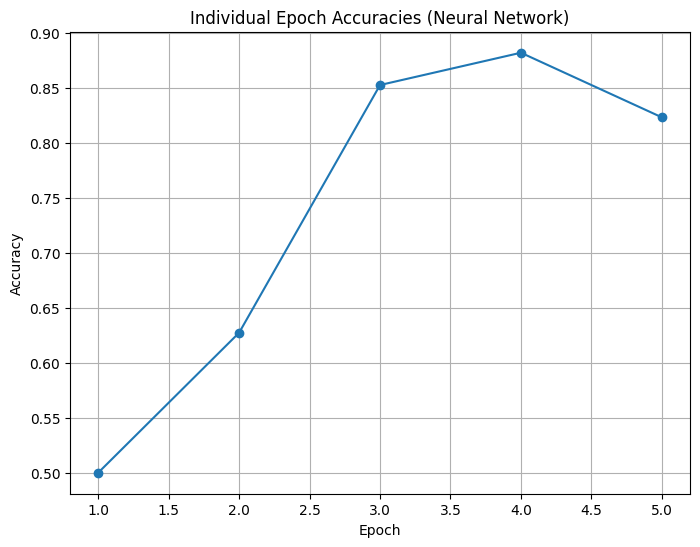

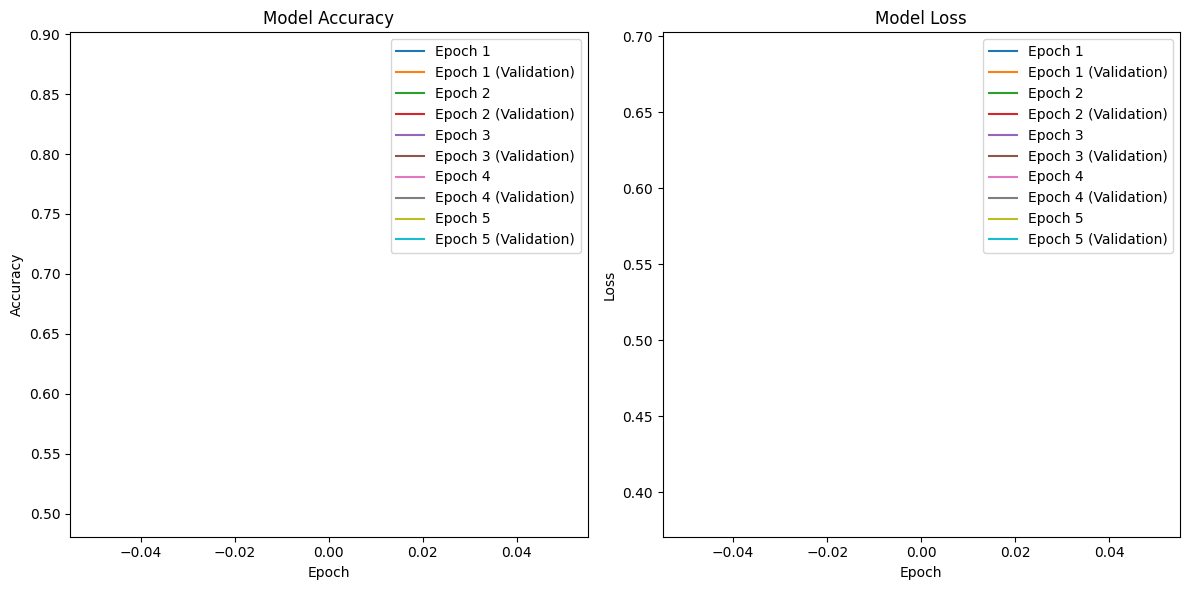

In [11]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define the directory containing augmented spectrogram images
augmented_directory = '/content/sample_data/AugmentedSpectrograms'

# Define input shape for your spectrogram images
input_shape = (224, 224, 3)

# Load pre-trained GoogleNet (InceptionV3) and VGG16 models
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze layers in the pre-trained models (optional)
for layer in inception_model.layers:
    layer.trainable = False

for layer in vgg16_model.layers:
    layer.trainable = False

# Global average pooling layers
inception_output = GlobalAveragePooling2D()(inception_model.output)
vgg16_output = GlobalAveragePooling2D()(vgg16_model.output)

# Concatenate the outputs of both models
merged = concatenate([inception_output, vgg16_output])

# Feature fusion layer
feature_fusion = Dense(512, activation='relu')(merged)

# Create a feature extraction model
feature_extraction_model = Model(inputs=[inception_model.input, vgg16_model.input], outputs=feature_fusion)

# Data preprocessing
data = []
labels = []

class_labels = ["dementia", "nondementia"]

for label_idx, label in enumerate(class_labels):
    label_directory = os.path.join(augmented_directory, label)
    for filename in os.listdir(label_directory):
        if filename.endswith('.png'):
            image_path = os.path.join(label_directory, filename)
            img = load_img(image_path, target_size=input_shape)
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)

data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data / 255.0

# Extract features
features = feature_extraction_model.predict([data, data])

# Encode class labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Build a simple neural network for classification
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(features.shape[1],)))
model.add(Dense(1, activation='sigmoid'))  # Adjust based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set the number of epochs
num_epochs = 5

# List to store accuracy for each epoch
epoch_accuracies = []

# List to store training history for each epoch
history_list = []

# Perform conversion and augmentation for each epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Training
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

    # Append accuracy for this epoch to the list
    epoch_accuracies.append(history.history['accuracy'])

    # Append history for this epoch to the list
    history_list.append(history.history)

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Training
    try:
        rf_classifier.fit(X_train, y_train)
    except Exception as e:
        print("Error during training:", e)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_labels)

    # Display results
    print("Random Forest Classifier:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)

    # Visualize results using individual figures for Confusion Matrix and Bar Graphs

    # ... (previous code for confusion matrix and bar graphs)

# Plotting individual epoch accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o')
plt.title('Individual Epoch Accuracies (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plotting model accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
for i in range(num_epochs):
    plt.plot(history_list[i]['accuracy'], label=f'Epoch {i + 1}')
    plt.plot(history_list[i]['val_accuracy'], label=f'Epoch {i + 1} (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for i in range(num_epochs):
    plt.plot(history_list[i]['loss'], label=f'Epoch {i + 1}')
    plt.plot(history_list[i]['val_loss'], label=f'Epoch {i + 1} (Validation)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()